# Working

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")

In [3]:

from src.data import get_track , getBatch
from src.model import PCT_Transformer
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import matplotlib
plt.style.use("seaborn")
matplotlib.rcParams["axes.titlesize"] = 20
matplotlib.rcParams["axes.labelsize"] = 20 
matplotlib.rcParams["xtick.labelsize"] = 20
matplotlib.rcParams["ytick.labelsize"] = 20
matplotlib.rcParams["legend.fontsize"] = 20
matplotlib.rcParams["figure.figsize"] = (10,10)
matplotlib.rcParams["axes.grid"] = True

In [4]:
aPaths = glob.glob("data/*AllPSA.npy")
hpaths = glob.glob("data/*.hits.npy")
ap = np.random.choice(aPaths)
hp = np.random.choice(hpaths)
trk =  get_track(apth=ap,hpth=hp)
batch = getBatch(trk,batch_size=32)
X = batch[:,:,2:5]
Y = batch[:,:,5:]
model = PCT_Transformer()

# Experiment

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False))

In [5]:
trainDate = "2023_05_10-17_31_"
predictions = np.load(f"preds/{trainDate}preds.npy")
targets = np.load(f"preds/{trainDate}targets.npy")
loss = np.load(f"losses/{trainDate}loss.npy")
val_loss = np.load(f"losses/{trainDate}valloss.npy")

In [6]:
predictions[-1,-1,:,0]

array([-0.00579931,  0.06326196,  0.10339234,  0.05757747,  0.1144445 ,
        0.08291004,  0.05211009,  0.09525845,  0.04806153,  0.06418783,
        0.07303641,  0.11574662,  0.12655212,  0.03213869,  0.09288738,
       -0.0067101 ,  0.06726912,  0.07483859,  0.08804572,  0.12655212,
        0.11683578,  0.06287921,  0.03316052,  0.05718951,  0.07647277,
        0.0434726 ,  0.08936528,  0.11574662,  0.04044045,  0.04739837,
        0.06595413,  0.06632639,  0.06127305,  0.05713378,  0.06624532,
        0.07183222,  0.04623635,  0.0590956 ,  0.05140911,  0.06248004,
        0.05887793,  0.06963558,  0.03599222,  0.00956268,  0.08154625,
       -0.02498027,  0.08523852,  0.12481347,  0.06032924,  0.03774042,
        0.04585717,  0.07247458,  0.04139824,  0.05991254,  0.12006129,
       -0.00690504,  0.07217113,  0.06890339,  0.06317908,  0.08091591,
        0.06554986,  0.07743544,  0.06152801,  0.11806542], dtype=float32)

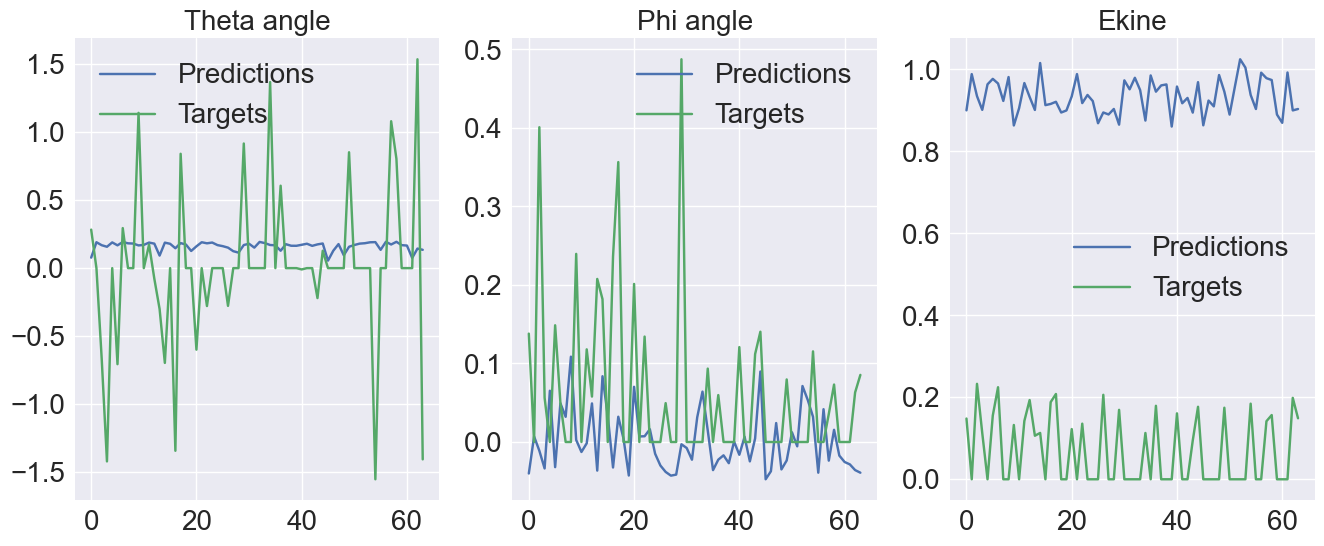

In [10]:
epochindex = -2
layid = -1

y1 = targets[epochindex,:,layid-2,0].reshape(-1)
x1 = predictions[epochindex,layid,:,0].reshape(-1)

y2 = targets[epochindex,:,layid-2,1].reshape(-1)
x2 = predictions[epochindex,layid,:,1].reshape(-1)

y3 = targets[epochindex,:,layid-2,2].reshape(-1)
x3 = predictions[epochindex,layid,:,2].reshape(-1)

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.title("Theta angle")
plt.plot(x1,label="Predictions")
plt.plot(y1,label="Targets")
plt.legend()

plt.subplot(1,3,2)
plt.title("Phi angle")
plt.plot(x2,label="Predictions")
plt.plot(y2,label="Targets")
plt.legend()

plt.subplot(1,3,3)
plt.title("Ekine")
plt.plot(x3,label="Predictions")
plt.plot(y3,label="Targets")
plt.legend()


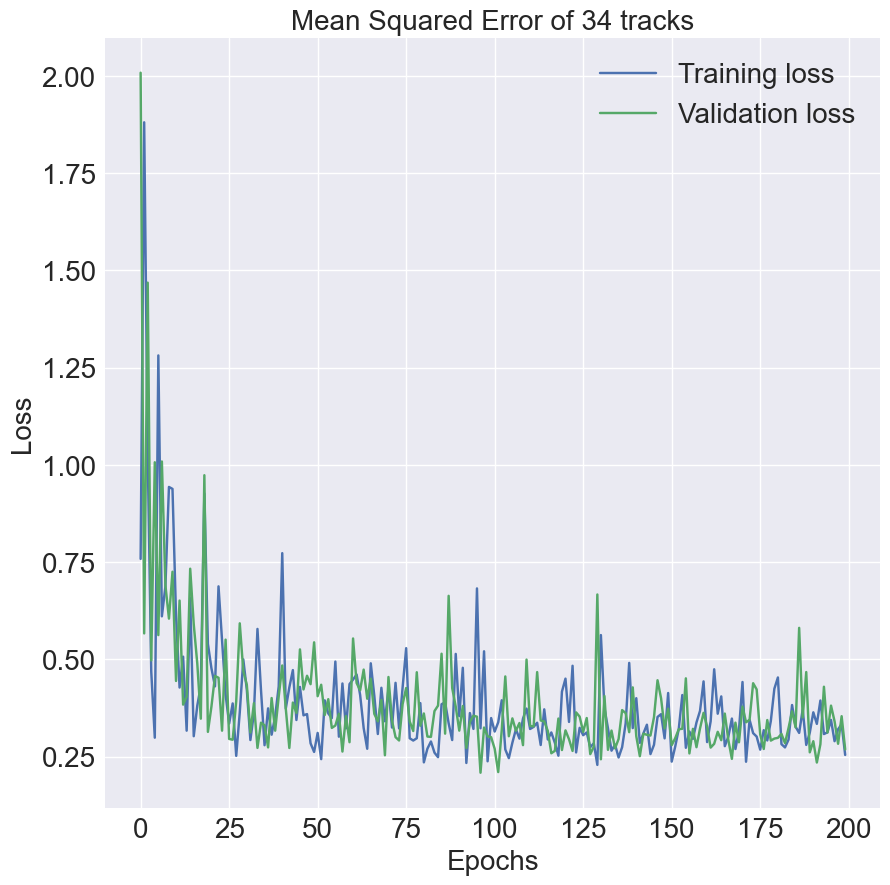

In [20]:
plt.title("Mean Squared Error of 34 tracks")
plt.plot(loss,label="Training loss",)
plt.plot(val_loss,label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
